### 시계열 분석

<Axes: >

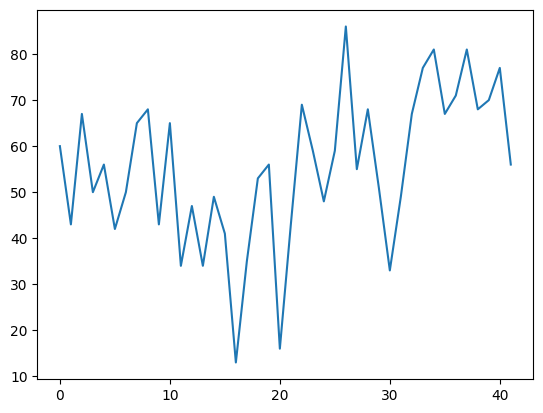

In [16]:
#영국왕들의 수명 데이터

import pandas as pd

df = pd.read_csv('./DATA/kings.dat',header=None,names=['age'])

df.head()
df.age.plot()

In [2]:
#안정적인 시계열 : 시간의 추이와 관계없이 평균,분산이 일정한 경우

#불안정적인 시계열 : 차분을 통해 시계열을 안정적으로 변환한 후 분석 진행

#1025 1030 1015 1030

# 1030-1025=5

# 1015-1030=-15

# 데이터.diff(periods=n) n 차분

# 정상성을 만족시키기 위해 차분을 사용함

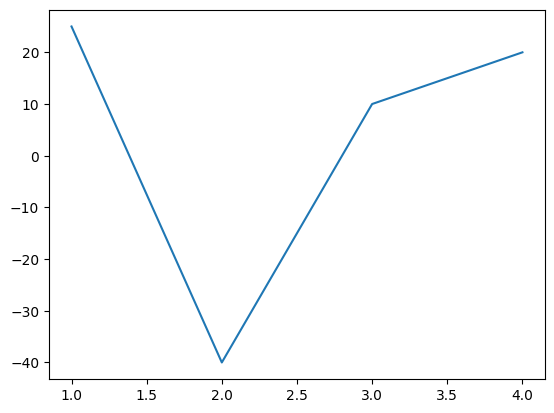

In [3]:
import matplotlib.pyplot as plt

a=pd.Series([1025,1050,1010,1020,1040])

b=a.diff(periods=1).iloc[1:]

plt.plot(b)

In [ ]:
#정상성(stationary) : 모든 시점에 평균이 일정한 특성

#  시간에 따라 확률적인 성분이 변하지 않는다는 가정, 정상성이 없으면 비시계열 자료로 분류됨

#차분(difference) : 현시점 자료에서 전시점 자료를 빼는 것

#평균이 일정하지 않은 시계열은 차분(difference)을 통해 정상화

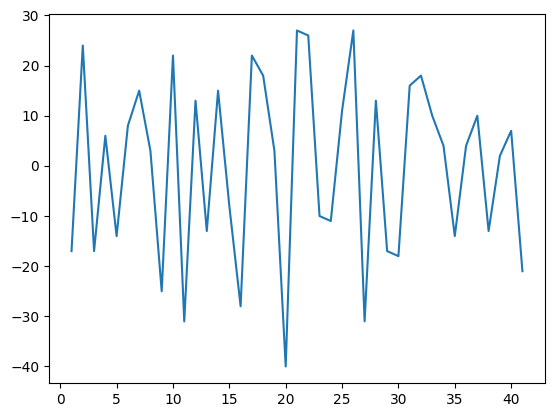

In [4]:
#1차 차분을 통해 데이터를 정상화하는 과정

diff1=df['age'].diff(periods=1).iloc[1:]

diff1.plot()

plt.show()



In [5]:
from statsmodels.tsa.stattools import adfuller

import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인

diff1=np.log(df['age']).diff(periods=1).iloc[1:]

result = adfuller(diff1)

print(result)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

(-7.44685642961395, 5.807660899733685e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.204960096784966)
ADF Statistic: -7.446856
p-value: 0.000000


In [7]:
#가장 적절한 arima 모델을 추천해주는 함수

# arima: AR모형과 MA모형을 결합한 함수

# arima(p,d,q)

# ar(p) 모형의 p,  

#   자기상관모형(Autocorrelation) : 이전의 값이 이후의 값에 영향을 미치는 모형

#   ar(1) : 직전 데이터가 다음 데이터에 영향을 줄 경우

#   ex) 용수철을 잡아 당기면 원래 길이로 돌아가려는 경향

# ma(q) 모형의 q

#   이동평균(Moving Average) : 시간이 지날수록 평균값이 지속적으로 증가하거나 감소하는 경향

#   ma(1) 직전 데이터가 다음 데이터에 영향을 주는 경우

# d : 차분차수

In [10]:
#pip install pmdarima

from pmdarima.arima import auto_arima

model = auto_arima(df)

model

#가장 적절한 모형은 arima(0,1,1)



ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [11]:
#학습용,검증용 구분

train = df[:30]

test = df[30:]

print(len(df['age']))

print(df['age'].values)

print(df['age'].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


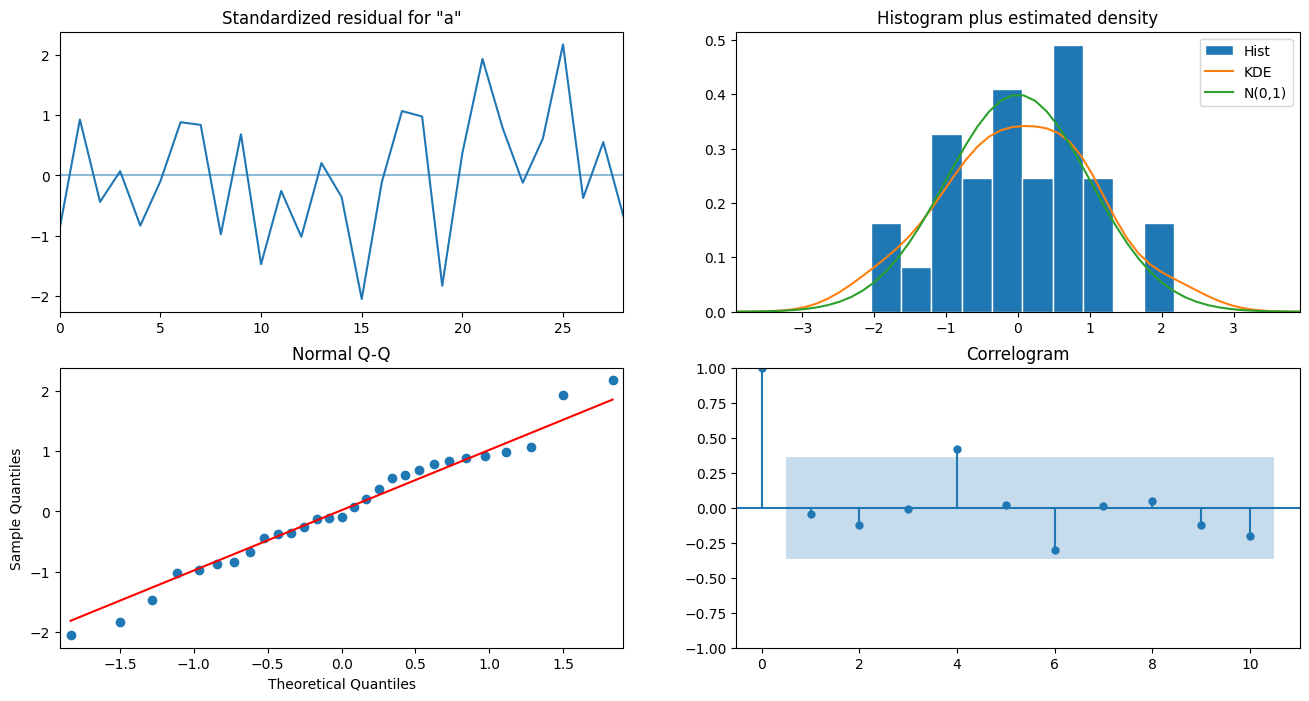

In [12]:
#arima(1,2,1)을 수행할 경우  order=c(1,2,1)로 모형을 생성함

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(0,1,1)).fit()

model.plot_diagnostics(figsize=(16, 8))

plt.show()
#Standardized residual: 잔차를 시계열로 그린 그래프

#Histogram plus estimated density와 Normal Q-Q : 잔차가 정규성을 만족하는가

#Normal Q-Q plot 데이터의 정규성 가정에 대한 검토, 모집단이 정규성을 따른다면 직선의 형태로 그려짐

#안정적인 시계열 자료이고 정규분포임


In [13]:
predictions = model.predict(start=1, end=len(test), dynamic=False)

predictions.index=len(train)+(predictions.index-1)

predictions

30    59.989111
31    51.115646
32    57.169734
33    54.861844
34    55.195907
35    51.513504
36    51.102642
37    54.818956
38    58.314968
39    54.271040
40    57.097169
41    51.021130
Name: predicted_mean, dtype: float64

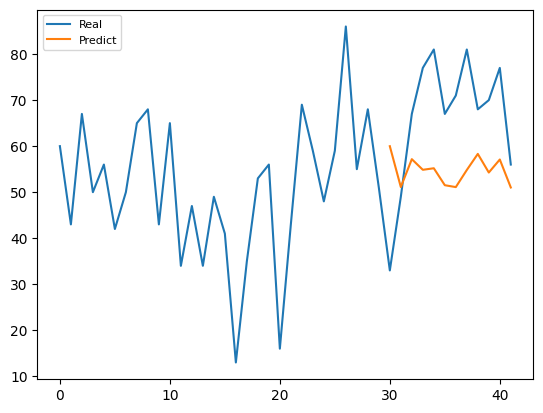

In [14]:
plt.plot(df,label='Real')

plt.plot(predictions,label='Predict')

plt.legend(loc='upper left',fontsize=8)

plt.show()

In [15]:
from sklearn.metrics import mean_squared_error  

mse = mean_squared_error(test, predictions)  

rmse = np.sqrt(mse)  

rmse

18.413687583787553

### 승객수 예측

In [17]:
import pandas as pd

df = pd.read_csv('./DATA/passengers.csv', index_col='Month')

df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<Axes: xlabel='Month'>

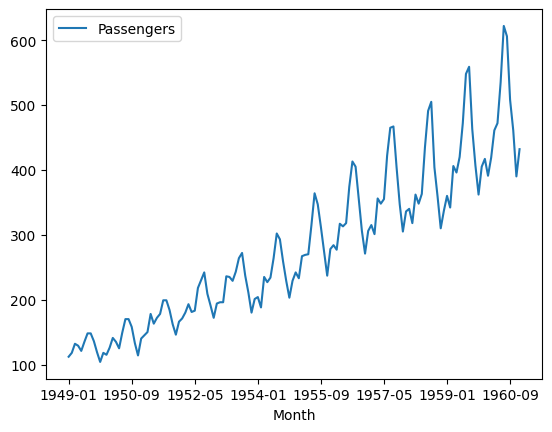

In [18]:
df.plot()

In [3]:
# df = df[['Passengers']]

# df.index.names = ['Month']

# df.sort_index(inplace=True)

# df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [19]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [20]:
dataset = df.astype('float32')

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(dataset)

In [22]:
train_size = int(len(scaled) * 0.8)

test_size = len(scaled - train_size)

train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

print(len(train), len(test))

115 29


In [23]:
import numpy as np

def create_dataset(dataset, timestep):

    print(len(dataset), timestep)

    dataX, dataY = [], []

    for i in range(len(dataset)-timestep-1):

        a = dataset[i:(i+timestep), 0]

        dataset[i + timestep, 0]

        dataX.append(a)

        dataY.append(dataset[i + timestep, 0])

    return np.array(dataX), np.array(dataY)

In [24]:
timestep = 2

X_train, y_train = create_dataset(train, timestep)

X_test, y_test = create_dataset(test, timestep)

115 2
29 2


In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)

print(X_test.shape)



(112, 2, 1)
(26, 2, 1)


In [26]:
from keras.models import Sequential

from keras.layers import SimpleRNN, Dense

np.random.seed(0)

model=Sequential()

model.add(SimpleRNN(units=20,input_shape=(timestep,1)))

model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='sgd')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 0.1951
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1393
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1096
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0892
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0750
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0643
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0558
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0494
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0446
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0406
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0375
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0349
Epoch 13/100
4/4 [==============================] - 0s 8ms/s

In [28]:
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train)

testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)

y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)

y_test = scaler.inverse_transform([y_test])

trainScore = np.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))

print(trainScore)

testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))

print(testScore)

1/1 [==============================] - 0s 20ms/step
45.27444468051341
145.42548527067345


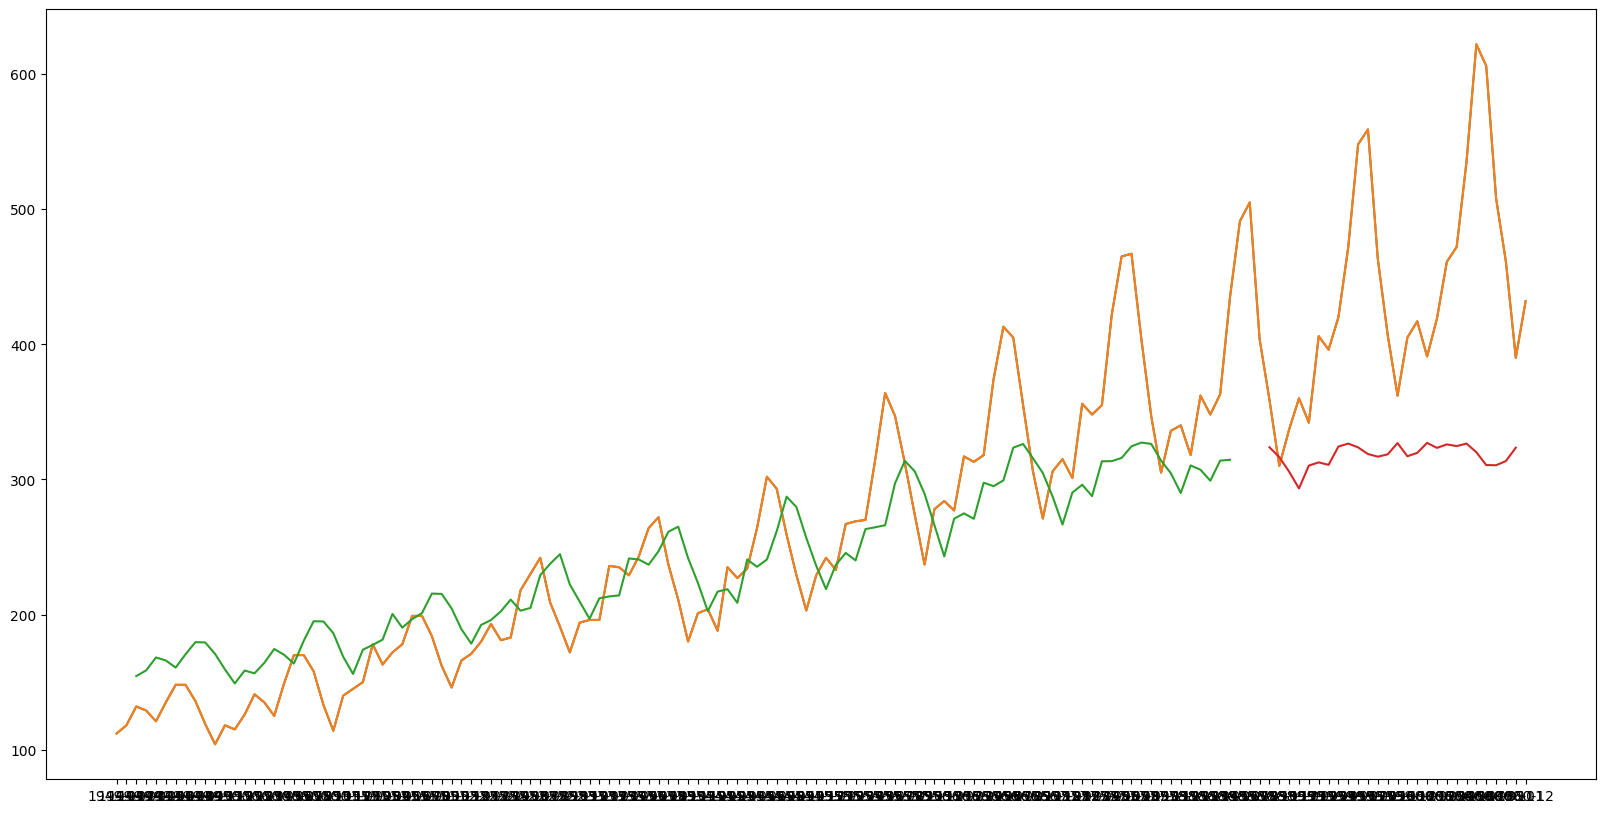

In [29]:
from matplotlib import pyplot as plt

trainPredictPlot = np.empty_like(dataset)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[timestep:len(trainPredict)+timestep, :] = trainPredict

testPredictPlot = np.empty_like(scaled)

testPredictPlot[:, :] = np.nan

testPredictPlot[len(trainPredict)+(timestep*2)+1:len(scaled)-1, :] = testPredict

plt.figure(figsize=(20,10))

plt.plot(scaler.inverse_transform(scaled))

plt.plot(dataset)

plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)

plt.show()

### 시계열 모형의 성능평가

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
import pandas as pd  

air_pollution = pd.read_csv('./DATA/air_pollution.csv', parse_dates=['date'])

air_pollution.set_index('date', inplace=True)

air_pollution.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [6]:
air_pollution.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


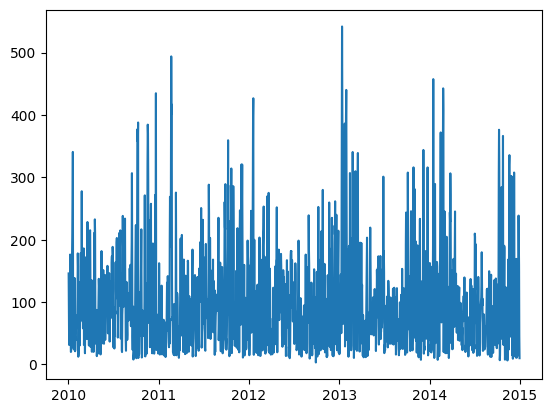

In [7]:
from matplotlib import pyplot as plt

plt.plot(air_pollution.pollution_today)

plt.show()

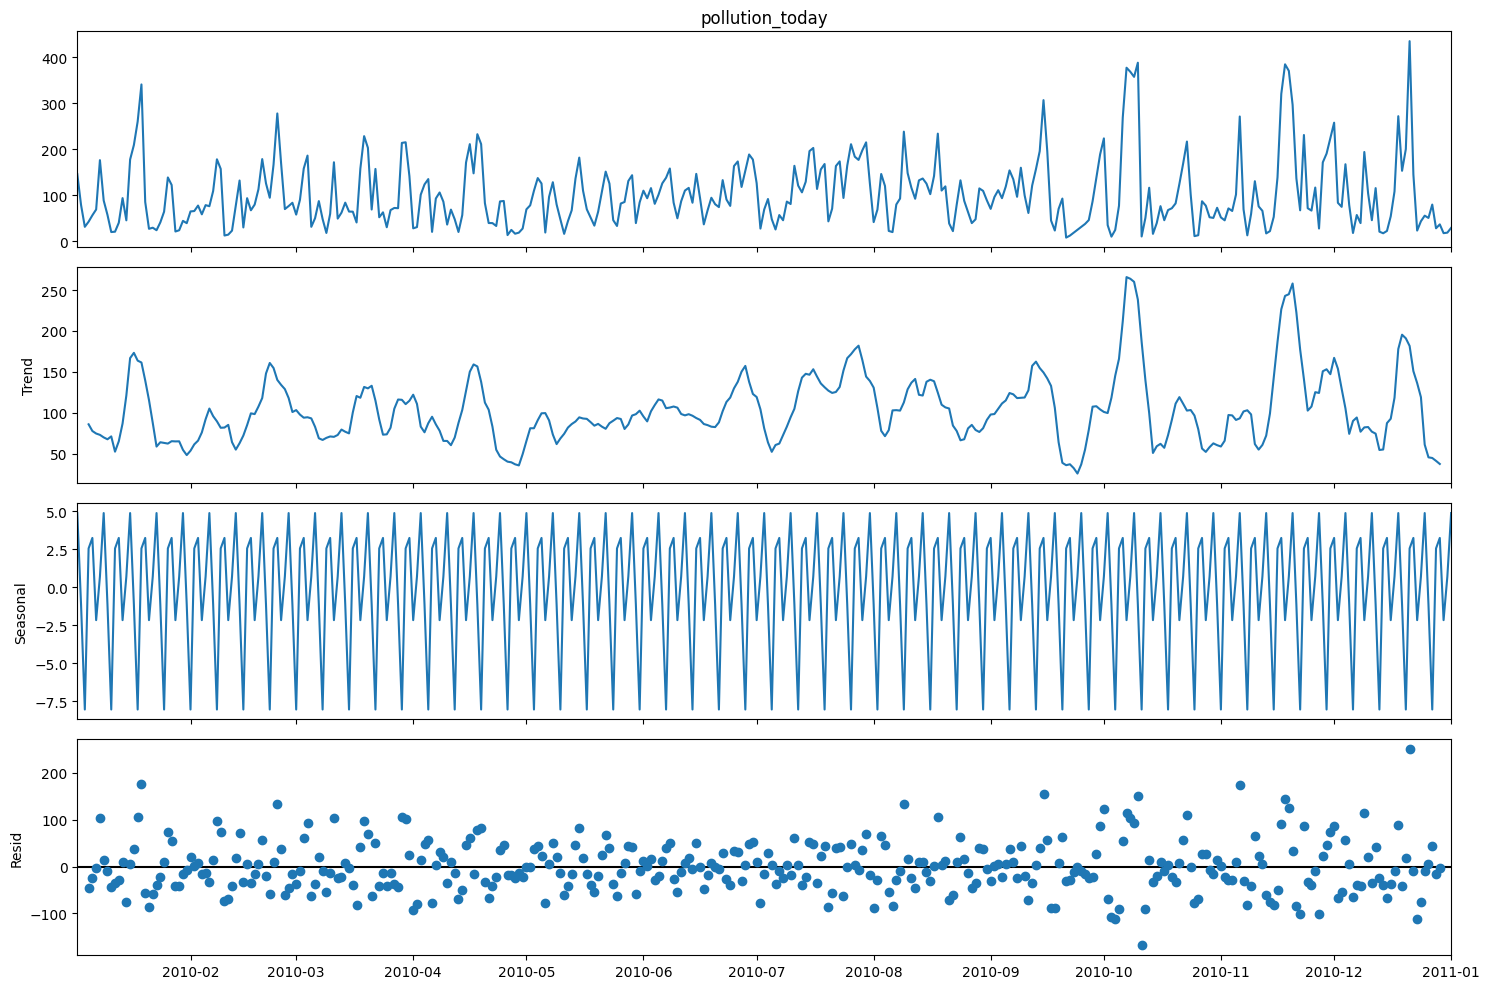

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams

series = air_pollution.pollution_today[:365] #처음 1년간의 자료

result = seasonal_decompose(series) #시계열 성분 분해

rcParams['figure.figsize'] = 15, 10

result.plot()

plt.show()

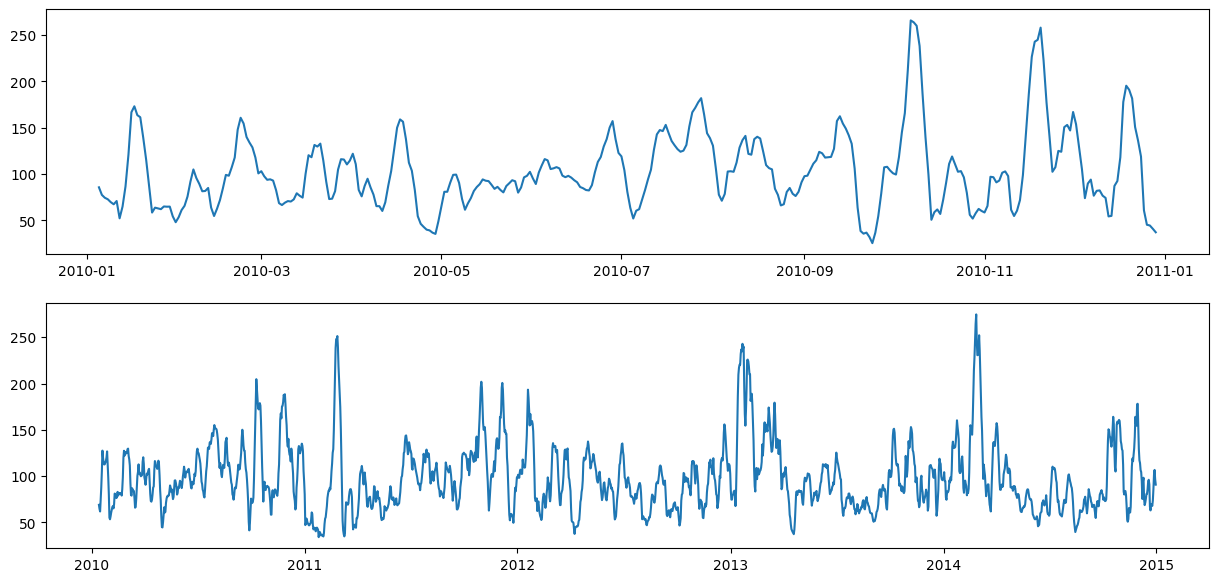

In [9]:
fig = plt.figure(figsize=(15, 7))

layout = (2, 2)

pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)

mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

pm_ax.plot(result.trend) #전체 기간

mm = air_pollution.pollution_today.rolling(12).mean() #이동평균(12일간)

mv_ax.plot(mm)

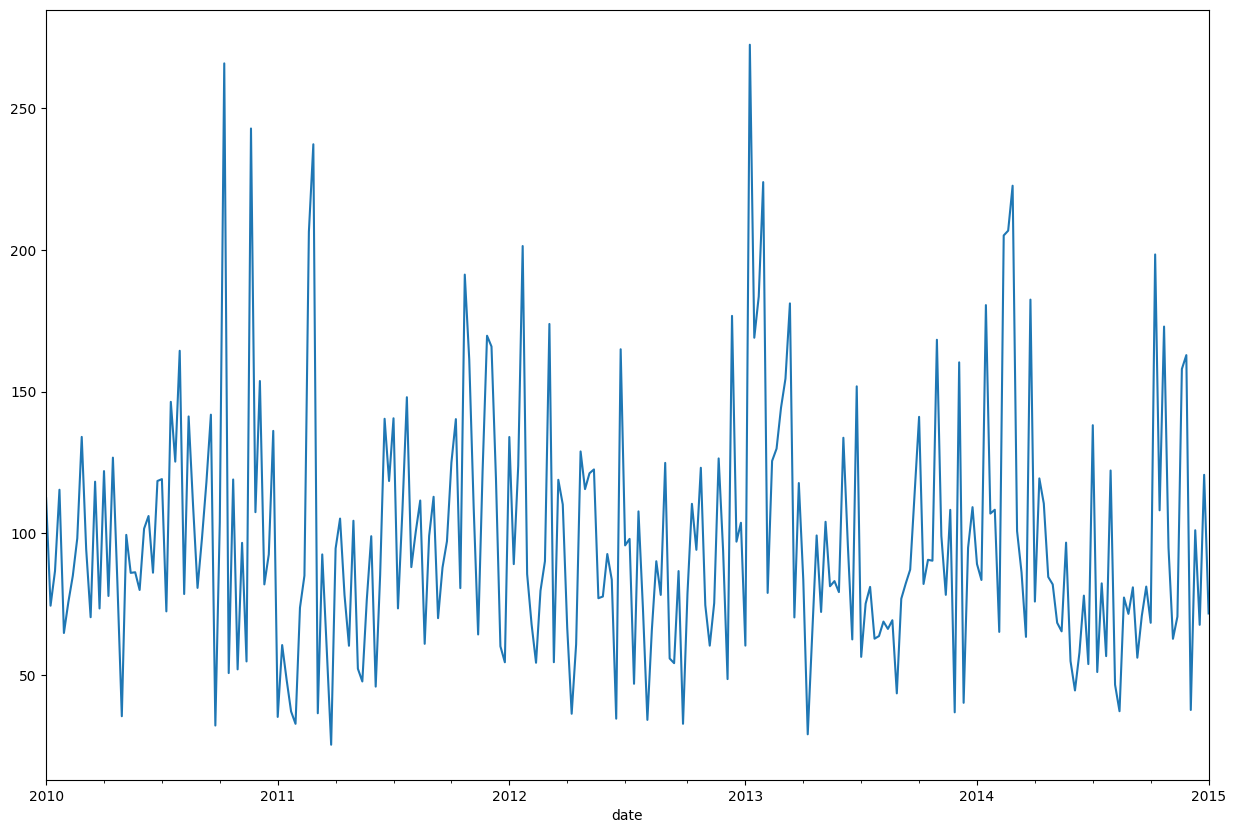

In [10]:
resample = air_pollution.resample('W') #시계열데이터를 주단위로 리샘플링

weekly_mean = resample.mean()

weekly_mean.pollution_today.plot()

plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

X = air_pollution.pollution_today.values

result = adfuller(X)

print('p-value: %f' % result[1])

p-value: 0.000000


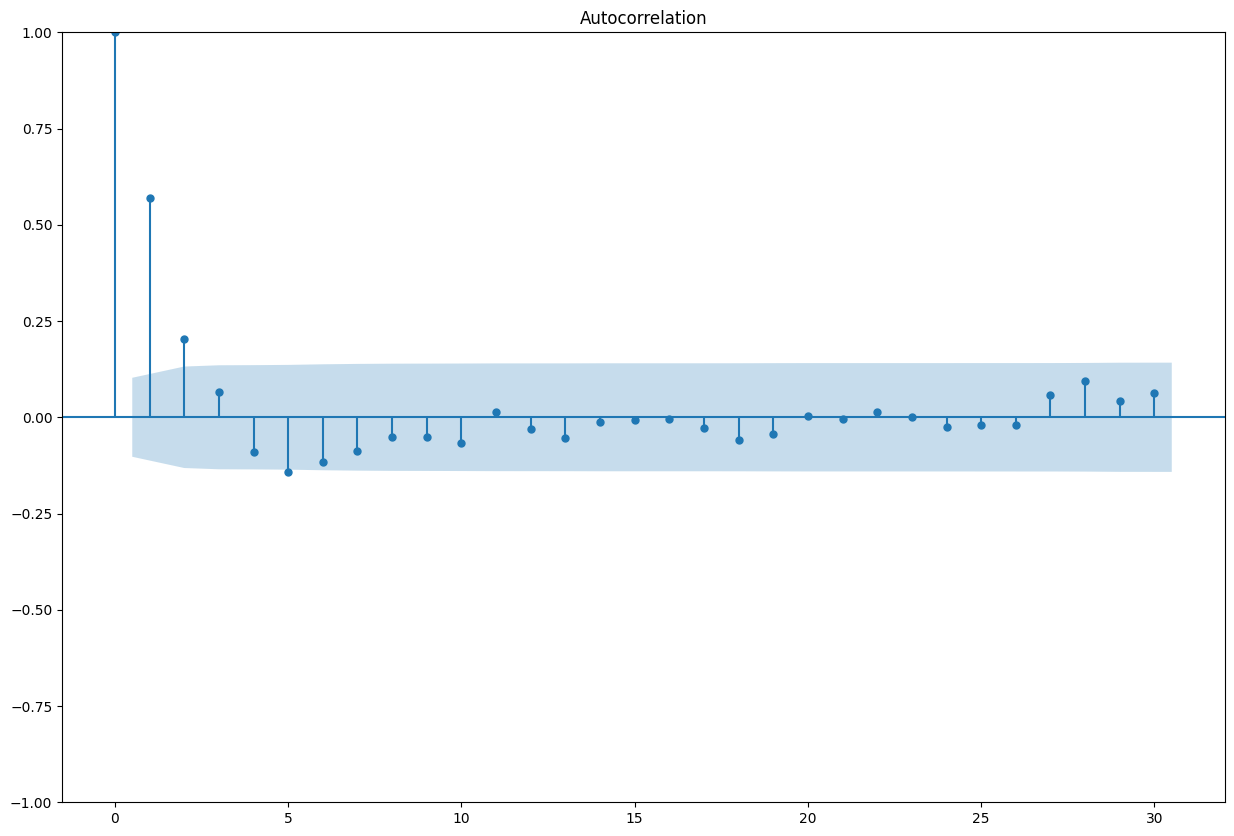

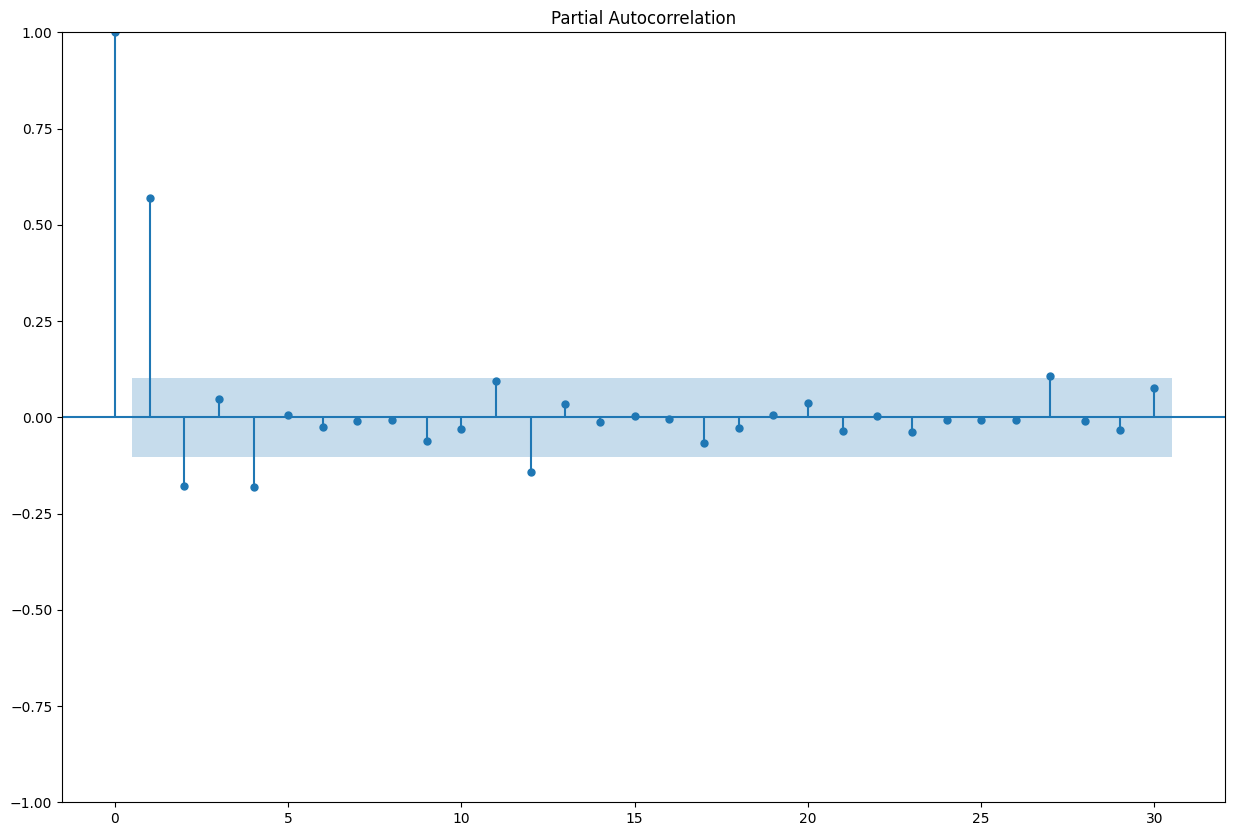

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf와 pacf를 통해 적합한 arima 모형 결정

# acf(자기상관함수), pacf(부분자기상관함수) , lag 시차

# lag 0 시점은 읽지 않음

# lag 3부터 점선 안에 존재함 lag 절단값은 3 => MA(3)

plot_acf(series, lags=30)

plot_pacf(series, lags=30)

# 절단값이 명확하지 않아 AR 모형 확정이 어려운 상태

plt.show()

In [15]:
resultsDict = {}

predictionsDict = {}

split_date = '2014-01-01'

df_training = air_pollution.loc[air_pollution.index <= split_date]

df_test = air_pollution.loc[air_pollution.index > split_date]

print(len(df_training))

print(len(df_test))

1461
364


In [17]:
!pip install pmdarima

     ---------------------------------------- 0.0/572.5 kB ? eta -:--:--
     ------------------------------------- 572.5/572.5 kB 17.6 MB/s eta 0:00:00
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/96/f7/3de8fe8d34df226fd17845e4b3c31931a52fcade54c3bc97d8fd851b3c8f/Cython-3.0.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------ --------- 2.1/2.8 MB 67.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 35.4 MB/s eta 0:00:00


In [18]:
import pmdarima as pm

autoModel = pm.auto_arima(df_training.pollution_today,

                          error_action='ignore', suppress_warnings=True, seasonal=False)

autoModel.fit(df_training.pollution_today)

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_training.pollution_today, order=(0,0,3)).fit()

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
import numpy as np

from sklearn.metrics import r2_score

def _error(real, pred):

    return real - pred

def mse(real, pred):

    return np.mean(np.square(_error(real, pred)))

def rmse(real, pred):

    return np.sqrt(mse(real, pred))

def mae(real, pred):

    return np.mean(np.abs(_error(real, pred)))

METRICS = {

    "mse": mse,

    "rmse": rmse,

    "mae": mae,

    "r2": r2_score,

}

def evaluate(real, pred, metrics=("mse", "rmse", "mae", "r2")):

    results = {}

    for name in metrics:

        try:

            results[name] = METRICS[name](real, pred)

        except:

            results[name] = np.nan

    return results

In [20]:
#from tqdm import tqdm
#from _tqdm import trange
#import tqdm
#시간이 오래걸림

index = len(df_training)

yhat = list()

#for t in tqdm(range(len(df_test.pollution_today))):
for t in range(len(df_test.pollution_today)):

    temp_train = air_pollution[:len(df_training)+t]

    model = ARIMA(temp_train.pollution_today, order=(0, 0, 3))

    model_fit = model.fit()

    predictions = model_fit.predict(

        start=len(temp_train), end=len(temp_train), dynamic=False)

    yhat = yhat + [predictions]

yhat = pd.concat(yhat)

resultsDict['ARIMA'] = evaluate(df_test.pollution_today, yhat.values)

predictionsDict['ARIMA'] = yhat.values

NameError: name 'ARIMA' is not defined

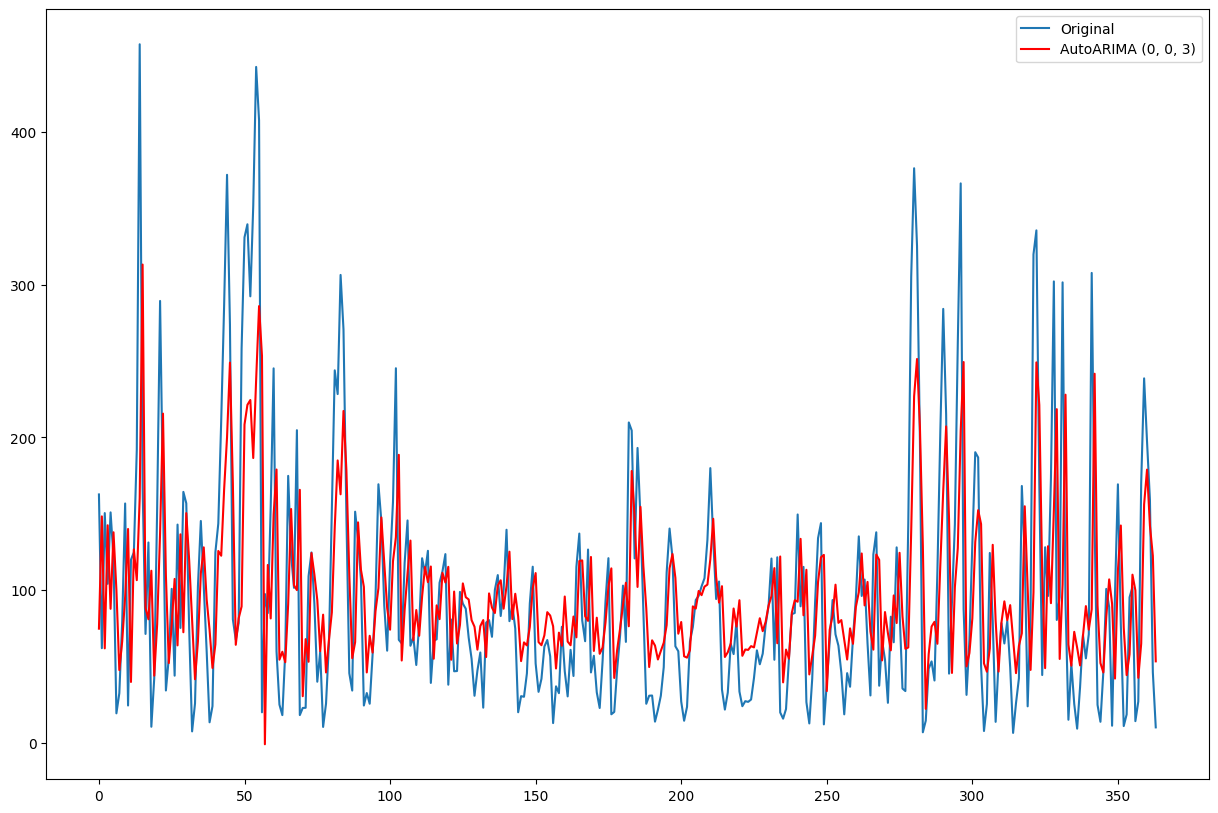

In [25]:
order = autoModel.order

plt.plot(df_test.pollution_today.values, label='Original')

plt.plot(yhat.values, color='red', label='AutoARIMA {0}'.format(order))

plt.legend()

plt.show()

In [34]:
def create_time_features(df, target=None):

    df['date'] = df.index

    df['hour'] = df['date'].dt.hour

    df['dayofweek'] = df['date'].dt.dayofweek
    
    df['quarter'] = df['date'].dt.quarter

    df['month'] = df['date'].dt.month

    df['year'] = df['date'].dt.year

    df['dayofyear'] = df['date'].dt.dayofyear

    df['sin_day'] = np.sin(df['dayofyear'])

    df['cos_day'] = np.cos(df['dayofyear'])

    df['dayofmonth'] = df['date'].dt.day

    #df['weekofyear'] = df['date'].dt.weekofyear

    X = df.drop(['date'], axis=1)

    if target:

        y = df[target]

        X = X.drop([target], axis=1)

        return X, y

    return X

In [3]:
from sklearn.preprocessing import StandardScaler

X_train_df, y_train = create_time_features(df_training, target='pollution_today')
X_test_df, y_test = create_time_features(df_test, target='pollution_today')

scaler = StandardScaler()

scaler.fit(X_train_df)  

X_train = scaler.transform(X_train_df)

X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)

X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

NameError: name 'create_time_features' is not defined

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['LinearRegression'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['LinearRegression'] = yhat

In [37]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=0)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['RF'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['RF'] = yhat

In [1]:
!pip install xgboost

In [2]:
from xgboost import XGBRegressor

reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

reg.fit(X_train, y_train,verbose=False)  

yhat = reg.predict(X_test)

resultsDict['XGBoost'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['XGBoost'] = yhat

NameError: name 'X_train' is not defined

In [41]:
from lightgbm import LGBMRegressor

lightGBM = LGBMRegressor()


X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

#################################

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['LinearRegression'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['LinearRegression'] = yhat

#################################

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=0)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['RF'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['RF'] = yhat

#################################

from xgboost import XGBRegressor

reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

reg.fit(X_train, y_train,verbose=False)  

yhat = reg.predict(X_test)

resultsDict['XGBoost'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['XGBoost'] = yhat

#################################

from lightgbm import LGBMRegressor

lightGBM = LGBMRegressor()

lightGBM.fit(X_train, y_train)

yhat = lightGBM.predict(X_test)

resultsDict['Lightgbm'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['Lightgbm'] = yhat

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
a=np.concatenate((df_training.pollution_today.values, np.zeros(len(X_train))+np.nan))

b=np.concatenate((np.zeros(len(X_train))+np.nan, yhat))

plt.plot(a, 'r-', label='real')

plt.plot(b, 'b-', label='pred')

plt.legend()

plt.show()



In [ ]:
from sklearn.svm import SVR

reg = SVR(kernel='rbf', C=100, gamma=0.01)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['SVM'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['SVM'] = yhat

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=2)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['KNN'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['KNN'] = yhat

In [ ]:
import tensorflow as tf

tf.random.set_seed(0)

BATCH_SIZE = 64

BUFFER_SIZE = 100

WINDOW_LENGTH = 24

#타임스텝 7로 설정

def window_data(X, Y, window=7):

    x = []

    y = []

    for i in range(window-1, len(X)):

        x.append(X[i-window+1:i+1])

        y.append(Y[i])

    return np.array(x), np.array(y)

X_w = np.concatenate((X_train, X_test))

y_w = np.concatenate((y_train, y_test))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)

X_train_w = X_w[:-len(X_test)]

y_train_w = y_w[:-len(X_test)]

X_test_w = X_w[-len(X_test):]

y_test_w = y_w[-len(X_test):]

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))

train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))

val_data = val_data.batch(BATCH_SIZE).repeat()

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM,Dense

dropout = 0.0

lstm_model = Sequential([

    LSTM(128, input_shape=X_train_w.shape[-2:], dropout=dropout),

    Dense(128),

    Dense(128),

    Dense(1)

])

lstm_model.compile(optimizer='rmsprop', loss='mae')

lstm_model.summary()



In [ ]:
#steps_per_epoch : 훈련 샘플수 / 배치 사이즈

model_history = lstm_model.fit(train_data, epochs=10,

                                      steps_per_epoch=200,

                                      validation_data=val_data, validation_steps=50)

yhat = lstm_model.predict(X_test_w).reshape(1, -1)[0]

resultsDict['LSTM'] = evaluate(y_test, yhat)

predictionsDict['LSTM'] = yhat

In [ ]:
def bar_metrics(resultsDict):

    df = pd.DataFrame.from_dict(resultsDict)

    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    pallette = plt.cm.get_cmap("tab20c", len(df.columns))

    colors = [pallette(x) for x in range(len(df.columns))]

    color_dict = dict(zip(df.columns, colors))

    fig = plt.figure(figsize=(20, 15))

    fields=['mae','mse','rmse','r2']

    for idx,field in enumerate(fields):

        fig.add_subplot(2, 2, idx+1)

        plt.title(field.upper())

        df.loc[field].sort_values().plot(

            kind="bar",

            colormap="Paired",

            color=[color_dict.get(x, "#333333") for x in df.loc[field].sort_values().index],

        )

        plt.legend()

    

    plt.tight_layout()

    plt.show()



In [ ]:
rcParams['xtick.labelsize'] = 15

rcParams['ytick.labelsize'] = 15

bar_metrics(resultsDict)

In [ ]:
def plot_tree(model):

    n_features =X_train_df.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), X_train_df.columns)

    plt.ylim(-1, n_features)

#특성 중요도

plot_tree(lightGBM)

In [ ]:
df = pd.DataFrame.from_dict(resultsDict).transpose().iloc[::-1]

df = df.round(2)

df

In [ ]:
rcParams['figure.figsize'] = 15, 5

df_mse=df.sort_values(by='mse')

plt.bar(df_mse.index, df_mse.mse)

In [ ]:
df_rmse=df.sort_values(by='rmse')

plt.bar(df_rmse.index, df_rmse.rmse)


In [ ]:

df_mae=df.sort_values(by='mae')

plt.bar(df_mae.index, df_mae.mae)

In [ ]:
df_r2=df.sort_values(by='r2', ascending=False)

plt.bar(df_r2.index, df_r2.r2)